In [ ]:
import nltk
import openpyxl
import pymorphy3
import json
import numpy as np
import pandas as pd
import datetime
import sklearn

# Обрабока котировок


In [ ]:
def getDateOnly(date):
  return datetime.date(date.year, date.month, date.day)
def getDateOnlyFromString(date_string):
  return getDateOnly(datetime.datetime.strptime(str(date_string), '%Y-%m-%d').date())
def getDateDiffs(dates):
  dates.values.tolist()
  result = []
  for i in range(1, len(dates)):
    result.append((getDateOnly(dates[i]) - getDateOnly(dates[i-1])).days)
  df = pd.DataFrame(result, columns=['DATE_DIFF'])
  return df.groupby(['DATE_DIFF'])['DATE_DIFF'].count()

In [ ]:
news = pd.read_csv('news_by_days_3.csv')

In [ ]:
news

,date,news_body
0,2000-10-27,руководитель рао еэс россия газпром анатолий ч...
1,2000-10-28,тюменнефтегаз довести среднесуточный добыча не...
2,2000-10-29,тюменнефтегаз довести среднесуточный добыча не...
3,2000-10-30,тюменнефтегаз довести среднесуточный добыча не...
4,2000-10-31,electricite de france заявить намерение инвест...
...,...,...
8193,2023-04-03,четверг март мск фьючерс американский индекс s...
8194,2023-04-04,котировка азиатский индекс пятница утром торго...
8195,2023-04-05,совет евразийский экономический комиссия засед...
8196,2023-04-06,апр риа новость власть шри ланка планировать п...


In [ ]:
getDateDiffs(news['date'].apply(lambda date: datetime.datetime.strptime(str(date), '%Y-%m-%d').date()))

DATE_DIFF
1    8197
Name: DATE_DIFF, dtype: int64

в датасете все даты идут последовательно, без пропусков

In [ ]:
market_path = 'market_data/sber_Y.csv'

ВНИМАНИЕ! на данном этапе необходимо пропустить нужное количество строк для совпадения дат начала **новосей** и **результатов**

In [ ]:
sber_Y = pd.read_csv(market_path) 
sber_Y['DATE'] = sber_Y['DATE'].apply(lambda x: getDateOnlyFromString(x))
sber_Y

In [ ]:
sber_Y = pd.DataFrame(sber_Y.iloc[206:8404]).reset_index(drop=True)
sber_Y

,DATE,Y
0,2000-10-27,0.006940
1,2000-10-28,-0.006435
2,2000-10-29,-0.006477
3,2000-10-30,-0.006519
4,2000-10-31,-0.008004
...,...,...
8193,2023-04-03,0.004310
8194,2023-04-04,-0.007254
8195,2023-04-05,-0.007864
8196,2023-04-06,0.008768


In [ ]:
#sber_Y['Y'] = sber_Y['Y'].apply(lambda x: x*100)
sber_Y['Y'] = sber_Y['Y'].apply(lambda x: x>0)
sber_Y

,DATE,Y
0,2000-10-27,True
1,2000-10-28,False
2,2000-10-29,False
3,2000-10-30,False
4,2000-10-31,False
...,...,...
8193,2023-04-03,True
8194,2023-04-04,False
8195,2023-04-05,False
8196,2023-04-06,True


In [ ]:
np.median(sber_Y['Y'].apply(lambda x: abs(x)))

1.0

In [ ]:
np.max(sber_Y['Y'].apply(lambda x: abs(x)))

1

In [ ]:
sber = pd.read_csv('market_data/sber_FULL.csv') 
sber = pd.DataFrame(sber.iloc[207:8405]).drop(['TICKER'], axis=1).reset_index(drop=True)
sber

,DATE,OPEN,HIGH,MID,LOW,CLOSE,VOL
0,2000-10-27,1170.000000,1170.000000,1160.000,1150.000000,1161.990000,3360
1,2000-10-28,1168.666667,1171.333333,1152.535,1133.736667,1149.326667,7461
2,2000-10-29,1167.333333,1172.666667,1145.070,1117.473333,1136.663333,11562
3,2000-10-30,1166.000000,1174.000000,1137.605,1101.210000,1124.000000,15663
4,2000-10-31,1130.000000,1137.000000,1128.500,1120.000000,1125.000000,4961
...,...,...,...,...,...,...,...
8193,2023-04-03,218.450000,219.440000,217.120,214.800000,216.090000,54788980
8194,2023-04-04,216.200000,217.290000,215.545,213.800000,214.830000,45747250
8195,2023-04-05,214.690000,216.300000,213.850,211.400000,216.150000,46127960
8196,2023-04-06,216.300000,217.380000,215.725,214.070000,214.250000,38993420


In [ ]:
sber.drop(['DATE'], axis=1,inplace=True)
sber

,OPEN,HIGH,MID,LOW,CLOSE,VOL
0,1170.000000,1170.000000,1160.000,1150.000000,1161.990000,3360
1,1168.666667,1171.333333,1152.535,1133.736667,1149.326667,7461
2,1167.333333,1172.666667,1145.070,1117.473333,1136.663333,11562
3,1166.000000,1174.000000,1137.605,1101.210000,1124.000000,15663
4,1130.000000,1137.000000,1128.500,1120.000000,1125.000000,4961
...,...,...,...,...,...,...
8193,218.450000,219.440000,217.120,214.800000,216.090000,54788980
8194,216.200000,217.290000,215.545,213.800000,214.830000,45747250
8195,214.690000,216.300000,213.850,211.400000,216.150000,46127960
8196,216.300000,217.380000,215.725,214.070000,214.250000,38993420


# Векторизация 


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(min_df=8)

bow_vectorized = bow.fit_transform(news['news_body'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow_vectorized, 
                                                    sber_Y['Y'].to_numpy(), 
                                                    test_size=0.2, 
                                                    random_state=777)

In [ ]:
X_train

<6558x78314 sparse matrix of type '<class 'numpy.int64'>'
	with 18090556 stored elements in Compressed Sparse Row format>

In [ ]:
y_train.shape

(6558,)

In [ ]:
X_test

<1640x78314 sparse matrix of type '<class 'numpy.int64'>'
	with 4409536 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

array([ 4.1236702 , -0.12056909,  0.71468221, ..., -1.91087322,
        1.24412644,  0.42706226])

In [ ]:
bow_vectorized.shape

(8198, 78314)

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = Pipeline([
    ('svd', TruncatedSVD()),
    ('dt', DecisionTreeRegressor())
])

In [ ]:
params = {
    'svd__n_components': (10, 50, 100, 150, 200)
    }

In [ ]:
bow_vectorized

<8198x78314 sparse matrix of type '<class 'numpy.int64'>'
	with 22500092 stored elements in Compressed Sparse Row format>

In [ ]:
grid_search = GridSearchCV(clf, params, scoring='r2',
    n_jobs=-1, verbose=1, cv=2)
# fit your documents (Should be a list/array of strings)
grid_search.fit(X_train, y_train)



Fitting 2 folds for each of 7 candidates, totalling 14 fits
Best score: -0.532
Best parameters set:


NameError: ignored

In [ ]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
best_parameters

Best score: -0.532
Best parameters set:


{'memory': None,
 'steps': [('svd', TruncatedSVD(n_components=200)),
  ('dt', DecisionTreeRegressor())],
 'verbose': False,
 'svd': TruncatedSVD(n_components=200),
 'dt': DecisionTreeRegressor(),
 'svd__algorithm': 'randomized',
 'svd__n_components': 200,
 'svd__n_iter': 5,
 'svd__n_oversamples': 10,
 'svd__power_iteration_normalizer': 'auto',
 'svd__random_state': None,
 'svd__tol': 0.0,
 'dt__ccp_alpha': 0.0,
 'dt__criterion': 'squared_error',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD()), ('dr', DecisionTreeRegressor())])

In [ ]:
y_pred_dtree = clf.predict(X_test)

In [ ]:
y_pred_dtree

array([-9.96935931e+01, -1.20860527e-01, -2.02632460e+00, ...,
       -6.87862347e-01, -2.13561132e-02,  4.25246195e-01])

In [ ]:
y_test

array([ 4.1236702 , -0.12056909,  0.71468221, ..., -1.91087322,
        1.24412644,  0.42706226])

In [ ]:
print('Decision tree MSE', mean_squared_error(y_pred_dtree, y_test))

Decision tree MSE 13.745785669104517


In [ ]:
print('Decision tree Test Accuracy: ', clf.score(X_test, y_test))

Decision tree Test Accuracy:  -2.374690642472717


### SVM

In [ ]:
from sklearn.svm import SVR

svr = SVR()

In [ ]:
svr.fit(X_train, y_train)

SVR()

In [ ]:
y_pred_svr = svr.predict(X_test)

In [ ]:
print('Decision tree MSE', mean_squared_error(y_pred_svr, y_test))

Decision tree MSE 3.9479296471922294


In [ ]:
print('SVR Test Accuracy: ', svr.score(X_test, y_test))

SVR Test Accuracy:  0.030754475717925778


### Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_y_train = [int(i>0)+1 for i in y_train]
nb_y_test = [int(i>0)+1 for i in y_train]

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train.toarray(), nb_y_train)

## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False)


In [ ]:
left_skip = 4000  #4000
right_skip = 5000 #-800

In [ ]:
# dataset = pd.concat([news['news_body'], sber], axis=1, join="inner")
# dataset

In [ ]:
tfidf_vectorized = tfidf.fit_transform(dataset['news_body'].values[left_skip:right_skip].astype('U'))

In [ ]:
tfidf_vectorized

<1000x46110 sparse matrix of type '<class 'numpy.float64'>'
	with 2661667 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorized, 
                                                    sber_Y['Y'][left_skip:right_skip].to_numpy(), 
                                                    test_size=0.2, 
                                                    random_state=777)

In [ ]:
X_train

<700x46110 sparse matrix of type '<class 'numpy.float64'>'
	with 1861097 stored elements in Compressed Sparse Row format>

In [ ]:
y_train.shape

(700,)

In [ ]:
X_test

<300x46110 sparse matrix of type '<class 'numpy.float64'>'
	with 800570 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

array([False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,

In [ ]:
tfidf_vectorized.shape

(1000, 46110)

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
tfidf_y_pred_dtree = clf.predict(X_test)

In [ ]:
tfidf_y_pred_dtree

array([0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [ ]:
y_test

array([False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,

In [ ]:
print('Decision tree MSE', mean_squared_error(tfidf_y_pred_dtree, y_test))

Decision tree MSE 0.29


In [ ]:
print('Decision tree Test Accuracy: ', clf.score(X_test, y_test))

Decision tree Test Accuracy:  -0.16082547589396912


### SVM

In [ ]:
from sklearn.svm import SVR

svr = SVR()

In [ ]:
svr.fit(X_train, y_train)

SVR()

In [ ]:
tfidf_y_pred_svr = svr.predict(X_test)

In [ ]:
tfidf_y_pred_svr

In [ ]:
print('Decision tree MSE', mean_squared_error(tfidf_y_pred_svr, y_test))

Decision tree MSE 0.1855784746075781


In [ ]:
print('SVR Test Accuracy: ', svr.score(X_test, y_test))

SVR Test Accuracy:  0.25715785826890103


In [ ]:
printScores(np.array([i>0.5 for i in tfidf_y_pred_svr.flatten()]), y_test)

f1-score: 0.7129337539432178
precision: 0.7337662337662337
recall: 0.6932515337423313


### Neural network

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Flatten, Reshape
from tensorflow.keras.layers import Embedding

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM, RNN, GRU, Embedding, Input
from keras.layers import LeakyReLU

In [ ]:
X_train.shape

(700, 46110)

In [ ]:
n_components=300

In [ ]:
svd = TruncatedSVD(n_components=n_components)

In [ ]:
svd_data = svd.fit_transform(X_train)

In [ ]:
svd_test = svd.fit_transform(X_test)

In [ ]:
y_train

In [ ]:
svd_data.shape

(700, 300)

In [ ]:
svd_test.shape

(300, 300)

In [ ]:
# model = Sequential()
# model.add(Input(shape=(svd_data.shape[1],)))
# model.add(Reshape((1,svd_data.shape[1])))
# model.add(Dense(40))
# model.add(LSTM(8, input_shape=(1, svd_data.shape[1]), return_sequences=True))
# model.add(LSTM(4, input_shape=(1, svd_data.shape[1]), return_sequences=False))
# model.add(Dense(4))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy',f1_m,precision_m, recall_m])
# es = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
# model = Sequential()
# model.add(Input(shape=(svd_data.shape[1],)))
# model.add(Reshape((1,svd_data.shape[1])))
# model.add(Dense(5))
# model.add(LSTM(16, input_shape=(1, svd_data.shape[1]), return_sequences=False))
# model.add(Dense(8))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy',f1_m,precision_m, recall_m])
# es = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
# model = Sequential()
# model.add(Input(shape=(svd_data.shape[1],)))
# model.add(Reshape((1,svd_data.shape[1])))
# model.add(LSTM(8, input_shape=(1, svd_data.shape[1]), return_sequences=True))
# model.add(LSTM(4, input_shape=(1, svd_data.shape[1]), return_sequences=False))
# model.add(Dense(2))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy',f1_m,precision_m, recall_m])
# es = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
# model = Sequential()
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='adamax',
#               metrics=['accuracy',f1_m,precision_m, recall_m])
# es = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_13 (Reshape)        (None, 1, 300)            0         
                                                                 
 lstm_15 (LSTM)              (None, 4)                 4880      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,905
Trainable params: 4,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(svd_data, y_train, batch_size = 8, epochs = 160, callbacks=[es])

Epoch 1/160
88/88 [==============================] - 1s 977us/step - loss: 0.6933 - accuracy: 0.4943 - f1_m: 0.4773 - precision_m: 0.4755 - recall_m: 0.6094
Epoch 2/160
88/88 [==============================] - 0s 885us/step - loss: 0.6926 - accuracy: 0.5443 - f1_m: 0.4972 - precision_m: 0.4951 - recall_m: 0.6025
Epoch 3/160
88/88 [==============================] - 0s 874us/step - loss: 0.6919 - accuracy: 0.5900 - f1_m: 0.5656 - precision_m: 0.5996 - recall_m: 0.6207
Epoch 4/160
88/88 [==============================] - 0s 874us/step - loss: 0.6908 - accuracy: 0.5857 - f1_m: 0.6824 - precision_m: 0.5541 - recall_m: 0.9567
Epoch 5/160
88/88 [==============================] - 0s 885us/step - loss: 0.6892 - accuracy: 0.6714 - f1_m: 0.7220 - precision_m: 0.6325 - recall_m: 0.9062
Epoch 6/160
88/88 [==============================] - 0s 885us/step - loss: 0.6868 - accuracy: 0.7086 - f1_m: 0.7278 - precision_m: 0.6550 - recall_m: 0.8638
Epoch 7/160
88/88 [==============================] - 0s 89

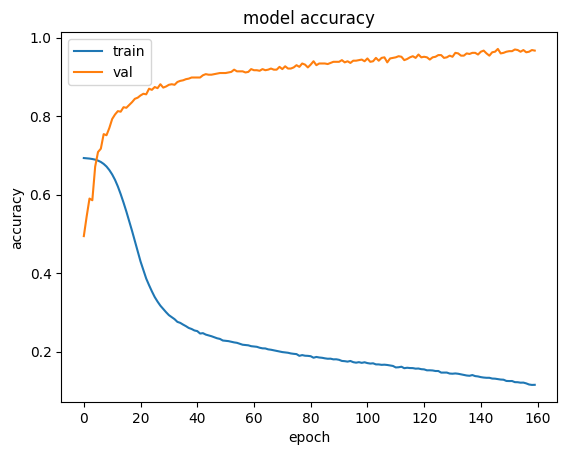

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(svd_test)

10/10 [==============================] - 0s 556us/step


In [ ]:
y_pred = np.array([i>0.5 for i in y_pred.flatten()])

In [ ]:
from sklearn.metrics import f1_score, precision_score,recall_score, precision_recall_curve
def printScores(y_test, y_pred):
  print(f"f1-score: {f1_score(y_test, y_pred)}")
  print(f"precision: {precision_score(y_test, y_pred)}")
  print(f"recall: {recall_score(y_test, y_pred)}")

def convertPredictionToBool(y_pred):
  return np.array([i>0.5 for i in y_pred.flatten()])

In [ ]:
printScores(y_pred, y_test)

f1-score: 0.5864197530864198
precision: 0.6168831168831169
recall: 0.5588235294117647


## Word2Vec